In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df=df.drop('Id',axis=1)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
X=df.drop('Species',axis=1)
y=df.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [21]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.9333333333333333

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [29]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[13  0  0]
 [ 0  8  1]
 [ 0  1  7]]


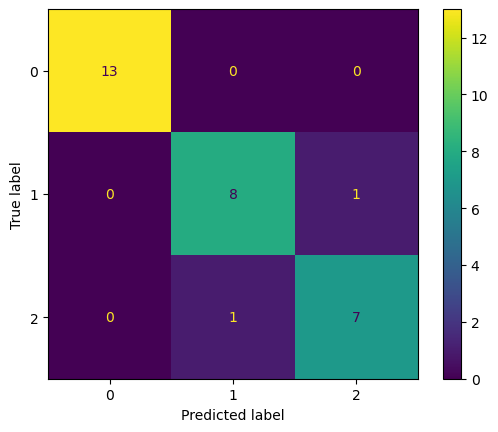

In [30]:
disp.plot()

In [31]:
def get_con_matrix(yt,yp):
    cm=confusion_matrix(yt,yp)
    return (cm[0][0],cm[0][1],cm[1][0],cm[1][1])

In [32]:
TP,FP,FN,TN=get_con_matrix(y_test,y_pred)
print("TP:",TP)
print("FP:",FP)
print("FN:",FN)
print("TN:",TN)
print("the accuracy is:",(TP+TN)/(TP+TN+FP+FN))
print("error rate is:",(1-(TP+TN)/(TP+TN+FP+FN)))
print("the presion is:",TP/(TP+FP))
print("The recall is:",TP/(TP+FN))

TP: 13
FP: 0
FN: 0
TN: 8
the accuracy is: 1.0
error rate is: 0.0
the presion is: 1.0
The recall is: 1.0


In [34]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

